In [1]:
# Load the required Python libraries

import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime
import ipywidgets as widgets
import glob, numpy

In [2]:
# Create case run output directories

output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [3]:
# Show a dropdown menu to select specific case output
# Any cases that have been run in our elmoutput directory will be displayed
# Case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG

display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_AK-BEOG_ICB20TRCNP…

In [4]:
# Get the output nc file options

output_casedir=output_rootdir+cases_dropdown.value+'/run/'
filenames=numpy.asarray(glob.glob("%s*.elm.h?.*.nc" % output_casedir))
filenames=sorted([x.split('/')[-1] for x in filenames])
if(os.path.exists(output_casedir+'ELM_output.nc')): filenames.insert(0,'ELM_output.nc')

ncfiles_dropdown = widgets.Dropdown(options=filenames,
                                description='Choose Output File:', 
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [5]:
# Display the output nc file options - in most cases you will select ELM_output.nc

display(ncfiles_dropdown)

Dropdown(description='Choose Output File:', layout=Layout(width='max-content'), options=('ELM_output.nc', 'OLM…

In [6]:
# Set the output

output_file=output_casedir+ncfiles_dropdown.value

In [7]:
# Load model output data into xarray format. 
# squeeze removes an empty grid cell dimension assuming this is a single point run

elm_output=xarray.open_dataset(output_file).squeeze()

In [8]:
# show the contents of elm_output

print(elm_output)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 60226, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 2015-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float3

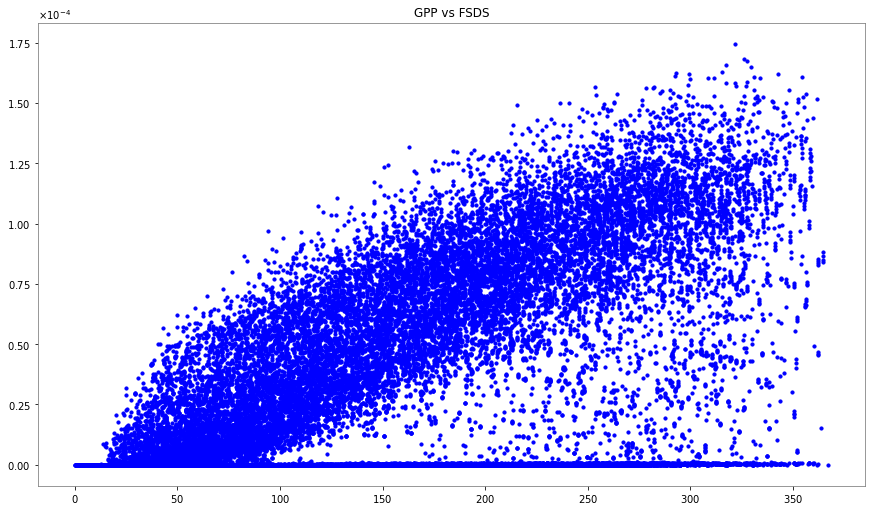

In [11]:
# GPP vs FSDS

fsds = elm_output['FSDS']
gpp = elm_output['GPP']

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(fsds, gpp, s=10, c='blue')
ax.set_title('GPP vs FSDS')
plt.show()


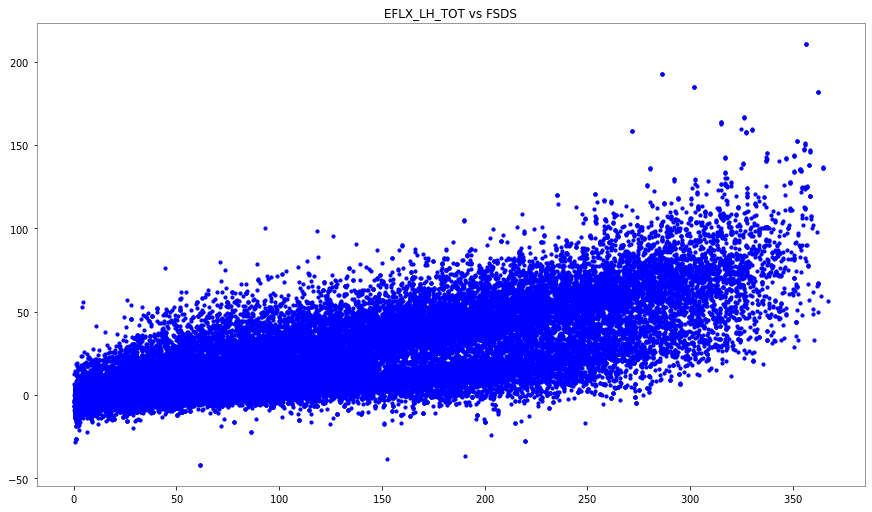

In [15]:
# EFLUX_LH_TOT vs FSDS

X = elm_output['FSDS']
Y = elm_output['EFLX_LH_TOT']

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(X, Y, s=10, c='blue')
ax.set_title('EFLX_LH_TOT vs FSDS')
plt.show()

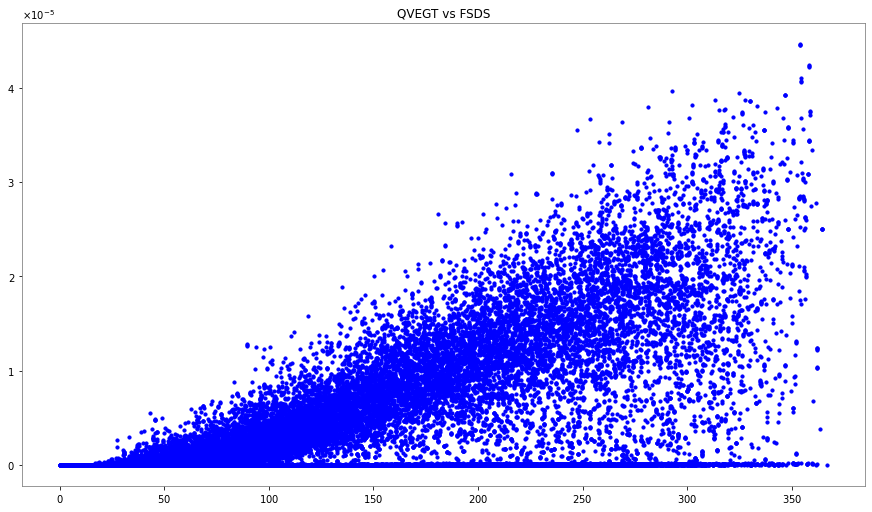

In [16]:
# QVEGT vs FSDS

X = elm_output['FSDS']
Y = elm_output['QVEGT']

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(X, Y, s=10, c='blue')
ax.set_title('QVEGT vs FSDS')
plt.show()

Text(0.5, 1.0, 'All-sky Albedo')

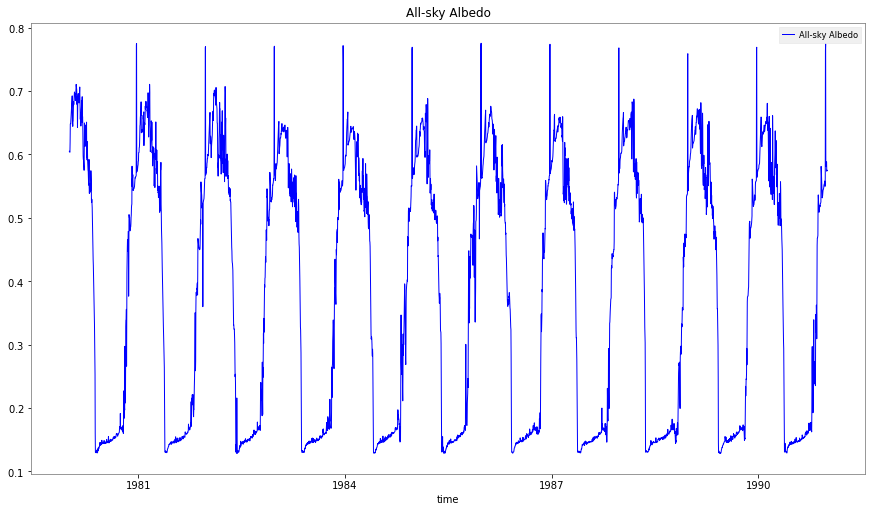

In [23]:
# Derived variable:
# Calculate all-sky albedo and plot the timeseries
elm_output['ASA'] = elm_output['FSR']/elm_output['FSDS'].where(elm_output['FSDS']>0)
elm_output['ASA'].attrs['units'] = 'unitless'
elm_output['ASA'].attrs['long_name'] = 'All sky albedo'


# Subset output to the 1980-1990 period
timerange=slice('1980-01-01','1991-01-01')

fig, ax = plt.subplots(clear=True, figsize=(12,7))
albedo.sel(time=timerange).plot(ax=ax,linestyle='-',color='blue',label='All-sky Albedo')
ax.legend()
ax.set_title('All-sky Albedo')

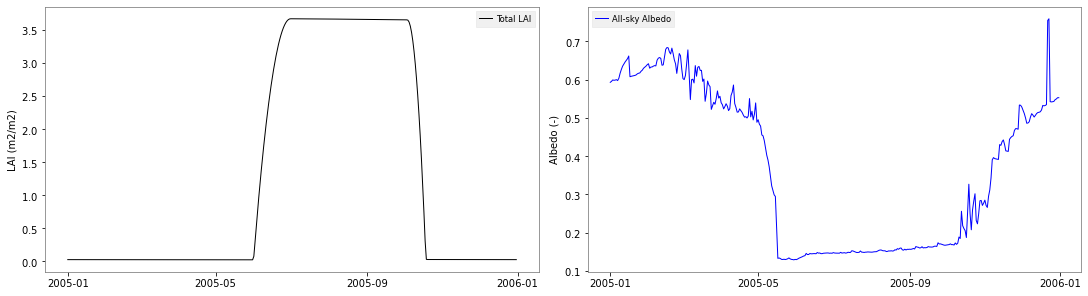

In [43]:
# Albedo and LAI plots
fig,a=plt.subplots(nrows=1,ncols=2,clear=True,num='Radiation',figsize=(15,4))

# Subset output to the 1980-1990 period
timerange=slice('2005-01-01','2005-12-31')

ax=a[0]
elm_output['TLAI'].sel(time=timerange).plot(ax=ax,linestyle='-',color='black',label='Total LAI')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.legend()

ax=a[1]
elm_output['ASA'].sel(time=timerange).plot(ax=ax,linestyle='-',color='blue',label='All-sky Albedo')
ax.set(title='',xlabel='',ylabel='Albedo (-)')
ax.legend()

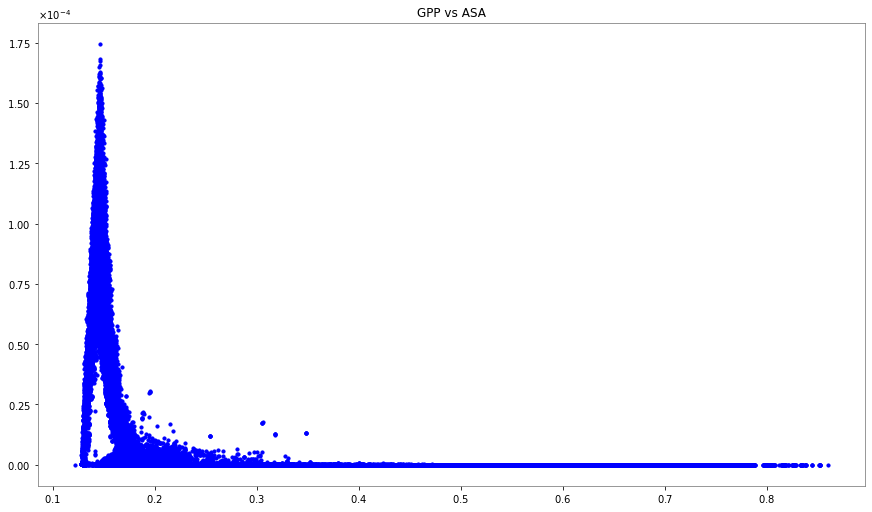

In [24]:
# GPP vs ASA

X = elm_output['ASA']
Y = elm_output['GPP']

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(X, Y, s=10, c='blue')
ax.set_title('GPP vs ASA')
plt.show()

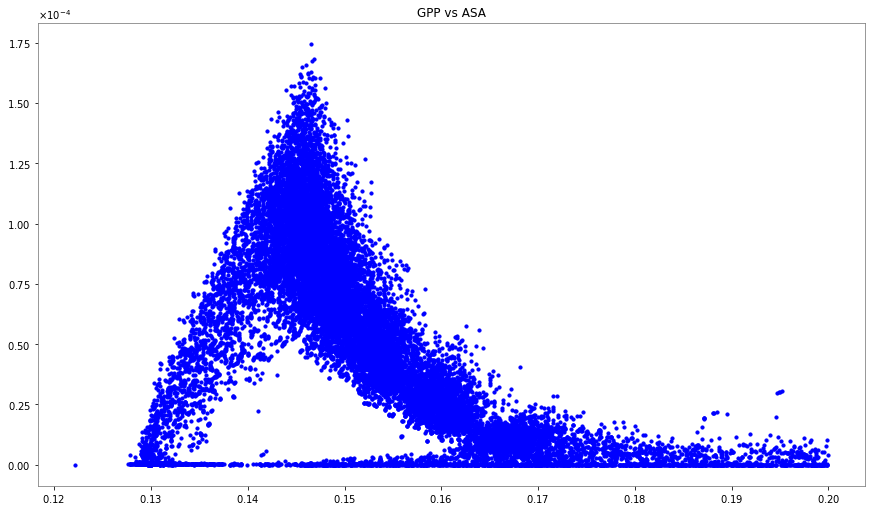

In [25]:
# GPP vs ASA
# non-winter period

X = elm_output['ASA'].where(elm_output['ASA']<0.2)
Y = elm_output['GPP'].where(elm_output['ASA']<0.2)

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(X, Y, s=10, c='blue')
ax.set_title('GPP vs ASA')
plt.show()

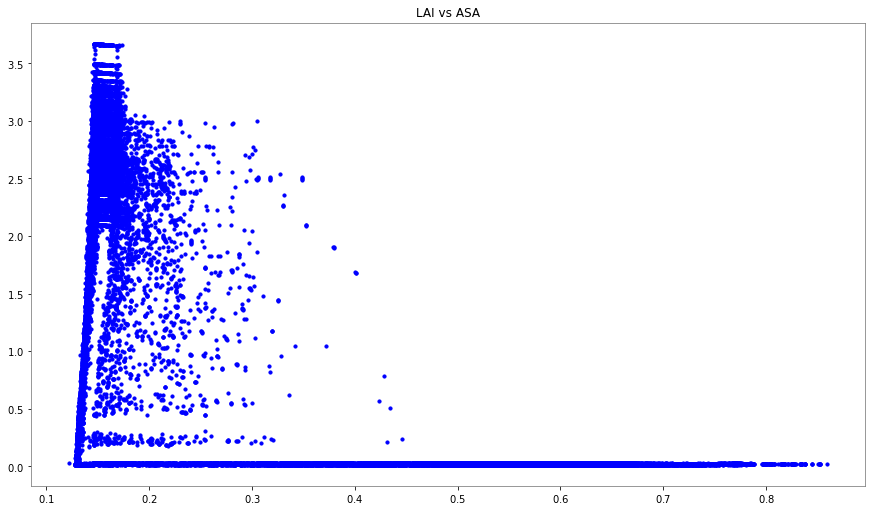

In [45]:
# LAI vs ASA


X = elm_output['ASA']
Y = elm_output['TLAI']

fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(X, Y, s=10, c='blue')
ax.set_title('LAI vs ASA')
plt.show()